In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DMML/CGPA_prediction.csv')

In [3]:
df.head()

,Timestamp,Student Name,Study Hour's (per day),Student CGPA
0,9/13/2023 21:12:43,Avik Roy Avi,2.0,3.00
1,9/13/2023 21:15:11,jahidul islam,8.0,3.17
2,9/13/2023 21:23:39,Parvez,16.0,3.85
3,9/13/2023 21:44:51,Tanver,5.0,3.07
4,9/13/2023 23:30:37,Cristiano sifando,1.0,3.90


In [4]:
df.shape

(40, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40 non-null     object 
 1   Student Name            40 non-null     object 
 2   Study Hour's (per day)  39 non-null     float64
 3   Student CGPA            39 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.4+ KB


In [6]:
df.isnull().sum()

Timestamp                 0
Student Name              0
Study Hour's (per day)    1
Student CGPA              1
dtype: int64

In [7]:
df.mean()

<ipython-input-7-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Study Hour's (per day)    4.756410
Student CGPA              3.231538
dtype: float64

In [8]:
df = df.fillna(df.mean())

<ipython-input-8-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [9]:
df.isnull().sum()

Timestamp                 0
Student Name              0
Study Hour's (per day)    0
Student CGPA              0
dtype: int64

In [10]:
df.shape

(40, 4)

In [11]:
df.describe()

,Study Hour's (per day),Student CGPA
count,40.000000,40.000000
mean,4.756410,3.231538
std,2.566729,0.532707
min,1.000000,2.600000
25%,3.000000,3.000000
50%,5.000000,3.060000
75%,6.000000,3.400000
max,16.000000,6.000000


In [12]:
df.drop(columns = 'Timestamp', inplace = True)

In [13]:
df.head()

,Student Name,Study Hour's (per day),Student CGPA
0,Avik Roy Avi,2.0,3.00
1,jahidul islam,8.0,3.17
2,Parvez,16.0,3.85
3,Tanver,5.0,3.07
4,Cristiano sifando,1.0,3.90


In [14]:
df.rename(columns = {'Student Name': 'student_name', 'Study Hour\'s (per day)': 'study_hours', 'Student CGPA': 'student_cgpa'}, inplace = True)

In [15]:
df.drop(columns = 'student_name', inplace = True)

In [16]:
df.head()

,study_hours,student_cgpa
0,2.0,3.00
1,8.0,3.17
2,16.0,3.85
3,5.0,3.07
4,1.0,3.90


In [17]:
x = df.study_hours
y = df.student_cgpa

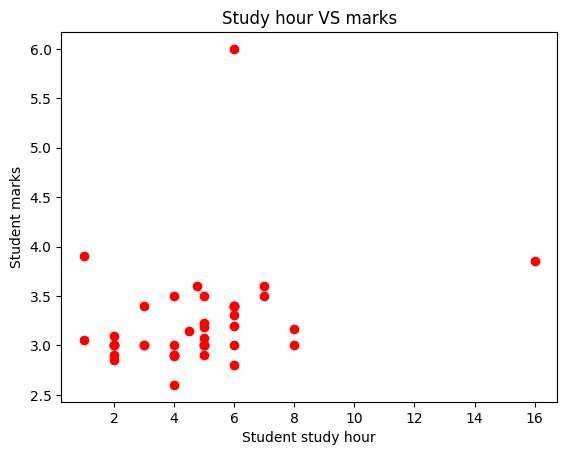

In [18]:
plt.scatter(x, y, color = 'red')
plt.xlabel('Student study hour')
plt.ylabel('Student marks')
plt.title('Study hour VS marks')
plt.show()

In [19]:
df.corr()

,study_hours,student_cgpa
study_hours,1.000000,0.275008
student_cgpa,0.275008,1.000000


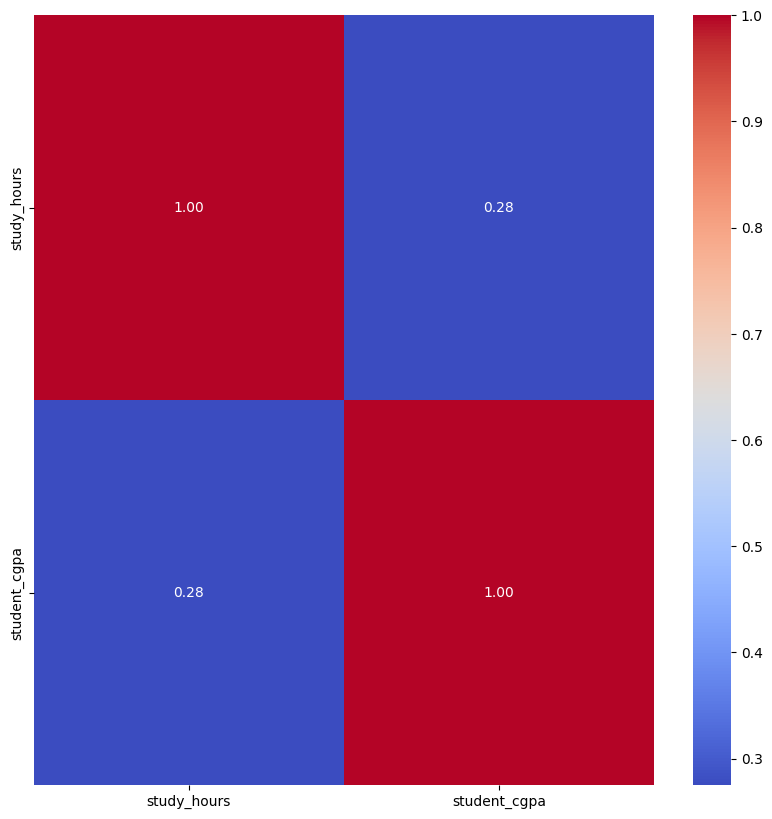

In [20]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot=True, cmap = "coolwarm", fmt=".2f")
plt.show()

In [21]:
X = df.drop('student_cgpa', axis = 'columns')
y = df.drop('study_hours', axis = 'columns')

In [22]:
print('X shape is:', X.shape)
print('Y shape is:', y.shape)

X shape is: (40, 1)
Y shape is: (40, 1)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [24]:
print('The shape of X train:', X_train.shape)
print('The shape of Y train:', y_train.shape)
print('The shape of X test:', X_test.shape)
print('The shape of Y train:', y_test.shape)

The shape of X train: (32, 1)
The shape of Y train: (32, 1)
The shape of X test: (8, 1)
The shape of Y train: (8, 1)


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
lr.coef_

array([[0.0632936]])

In [29]:
lr.intercept_

array([2.95435543])

In [30]:
y_pred = lr.predict(X_test)
y_pred

array([[3.96705299],
       [3.39741061],
       [3.27082341],
       [3.27082341],
       [3.33411701],
       [3.08094262],
       [3.08094262],
       [3.33411701]])

In [31]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ['Study_hours', 'Student_marks_original', 'Student_marks_predicted'])

,Study_hours,Student_marks_original,Student_marks_predicted
0,16.0,3.850000,3.967053
1,7.0,3.500000,3.397411
2,5.0,3.231538,3.270823
3,5.0,2.900000,3.270823
4,6.0,3.000000,3.334117
5,2.0,3.100000,3.080943
6,2.0,3.000000,3.080943
7,6.0,3.200000,3.334117


In [32]:
lr.score(X_test, y_test)

0.565090592343104